<a href="https://colab.research.google.com/github/Aishaamalik/Data-Analysis-on-Mental-Health-in-the-Tech-Industry/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis on Mental Health in the Tech Industry

In [80]:
import pandas as pd

df = pd.read_csv('survey.csv')
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# 1.Data Preprocessing

##Check for Missing Values

In [81]:
df.isnull().sum()


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


##Clean Inconsistent Data (e.g., Gender)

In [82]:
def clean_gender(gender):
    gender = gender.strip().lower()
    if gender in ['male', 'm', 'man']:
        return 'Male'
    elif gender in ['female', 'f', 'woman']:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)
df['Gender'].value_counts()


,count
Gender,
Male,976
Female,242
Other,41


##Handle Missing Values

In [83]:
df = df.drop(columns=['comments'])

# Let's fill some missing values where it makes sense
df['self_employed'].fillna('No', inplace=True)
df['work_interfere'].fillna('Don’t know', inplace=True)
df['state'].fillna('Unknown', inplace=True)

# Check if anything is still missing
df.isnull().sum()


<ipython-input-83-cc361b8e14fc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna('No', inplace=True)
<ipython-input-83-cc361b8e14fc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


##Drop Irrelevant Columns

In [84]:
df = df.drop(columns=['Timestamp', 'state'])

df.head()


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


##Encode Categorical Variables

In [85]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['self_employed', 'family_history', 'treatment', 'remote_work',
               'tech_company', 'benefits', 'care_options', 'wellness_program',
               'seek_help', 'anonymity', 'mental_health_interview',
               'phys_health_interview', 'obs_consequence']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['Gender', 'Country', 'no_employees', 'leave',
                                 'mental_health_consequence', 'phys_health_consequence',
                                 'coworkers', 'supervisor', 'mental_vs_physical', 'work_interfere'])

df.shape


(1259, 96)

In [86]:
df_clean = df.copy()

df_clean.to_csv('cleaned_survey.csv', index=False)

from google.colab import files
files.download('cleaned_survey.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Exploratory Data Analysis (EDA)


## 1. Age Distribution Analysis

Age Summary:
count    1252.000000
mean       32.059904
std         7.309669
min        11.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


<ipython-input-90-e4e16fbb6a67>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


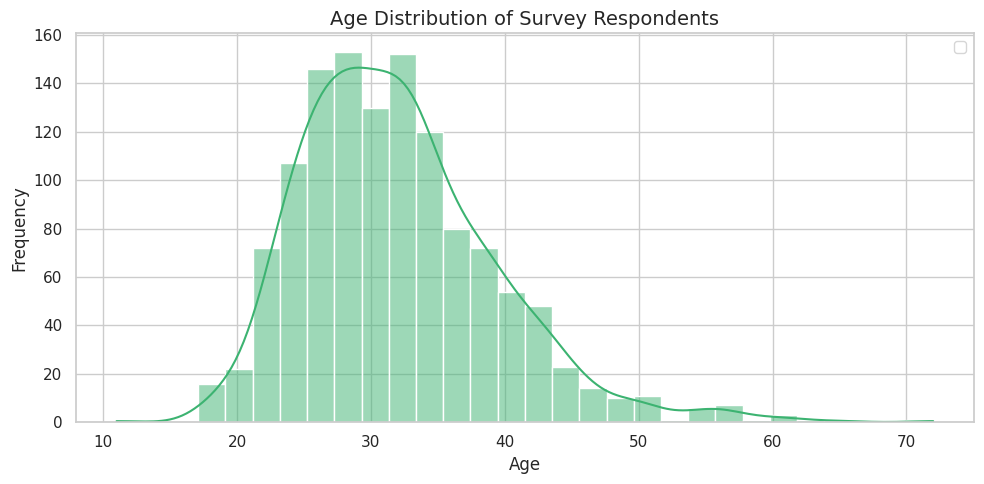

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (12, 6)
df = df[(df['Age'] > 10) & (df['Age'] < 100)]


print("Age Summary:")
print(df['Age'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='mediumseagreen')
plt.title('Age Distribution of Survey Respondents', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


##2. Gender Distribution

In [92]:
import seaborn as sns
import pandas as pd

print(df.head())
print(df.columns)
df.columns = df.columns.str.strip()
print(df['Gender'].unique())
print(df['Gender'].isnull().sum())


             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'Malr' 'femail' 'Cis Man'
 'ostensibly male,

<ipython-input-93-5e9edad6b706>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')
<ipython-input-93-5e9edad6b706>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


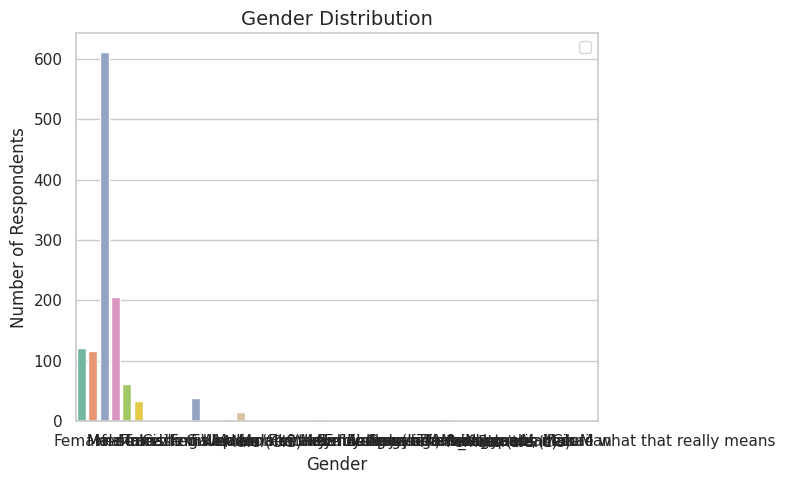

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns)
print(df['Gender'].unique())

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.legend()
plt.tight_layout()
plt.show()


This tells you how male/female/other-identifying individuals are represented in the dataset.

##3. Geographic Distribution (Top Countries)

<ipython-input-97-a1c9d1dabb7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
<ipython-input-97-a1c9d1dabb7e>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


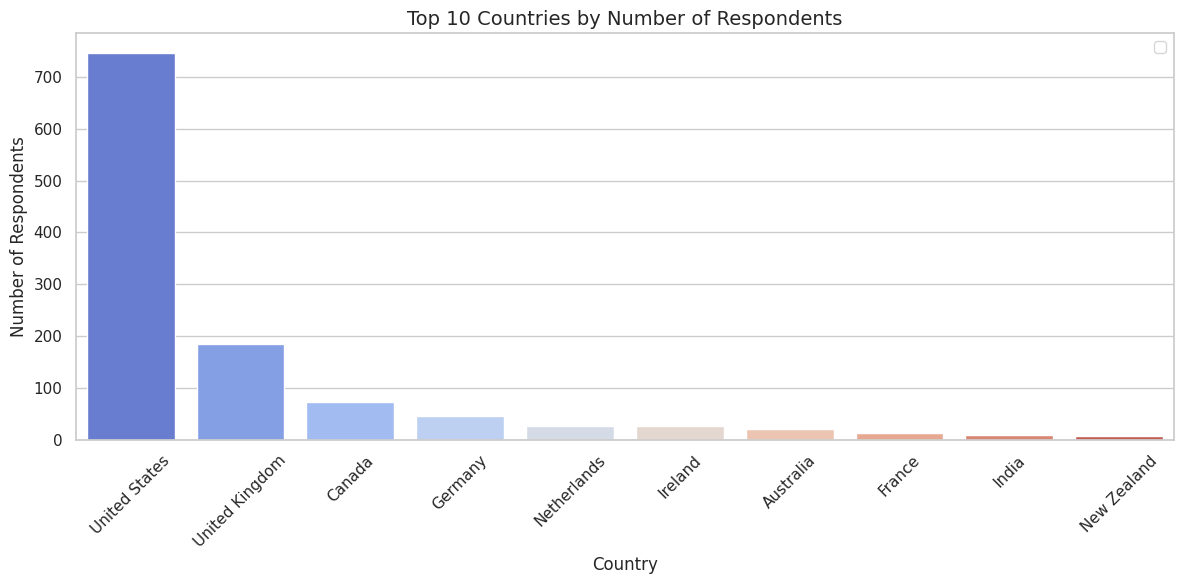

Top 10 Countries:
 Country
United States     747
United Kingdom    184
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
New Zealand         8
Name: count, dtype: int64


In [97]:
plt.figure(figsize=(12, 6))
top_countries = df['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')
plt.title('Top 10 Countries by Number of Respondents', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Display
print("Top 10 Countries:\n", top_countries)


The United States dominates the list with 751 entries, making up over 60% of the total. English-speaking countries make up the majority, indicating strong traction in Western markets. There's potential to expand into underrepresented regions like Asia and emerging economies.

##4. Job Role: Tech vs Non-Tech *Company*

<ipython-input-98-3476627442c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tech_company', palette='pastel')
<ipython-input-98-3476627442c1>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


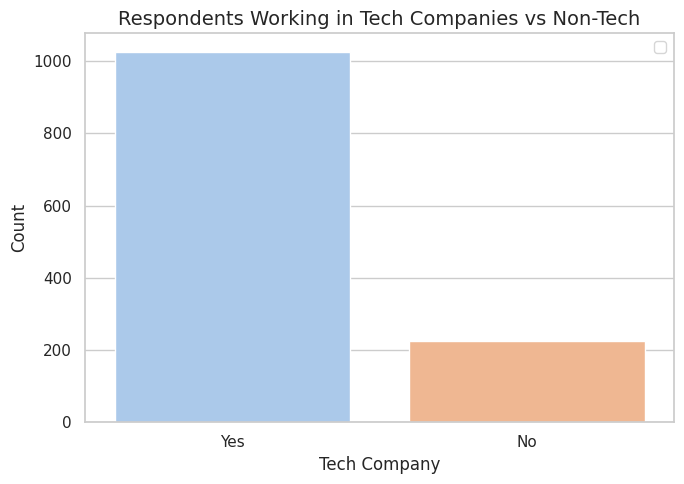

Tech Company Role Distribution:
 tech_company
Yes    1026
No      226
Name: count, dtype: int64

(%) Percentage:
 tech_company
Yes    81.948882
No     18.051118
Name: proportion, dtype: float64


In [98]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='tech_company', palette='pastel')
plt.title('Respondents Working in Tech Companies vs Non-Tech', fontsize=14)
plt.xlabel('Tech Company')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

# Display
tech_counts = df['tech_company'].value_counts()
tech_percent = df['tech_company'].value_counts(normalize=True) * 100

print("Tech Company Role Distribution:\n", tech_counts)
print("\n(%) Percentage:\n", tech_percent)


The data shows that a significant majority (81.9%) of respondents are affiliated with tech companies, while only 18.1% are from non-tech backgrounds. This indicates a strong appeal and relevance to individuals working within the tech industry. The high tech participation may reflect the platform’s alignment with industry-specific needs or interests. It also suggests that future content or offerings could be tailored more toward tech professionals to maintain engagement. However, there may be untapped potential in reaching broader, non-tech audiences.

## 5. Workplace Policies & Mental Health Support

### 5.1 Mental health benefits

<ipython-input-99-908ad74cc050>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='benefits', palette='YlGnBu')
<ipython-input-99-908ad74cc050>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


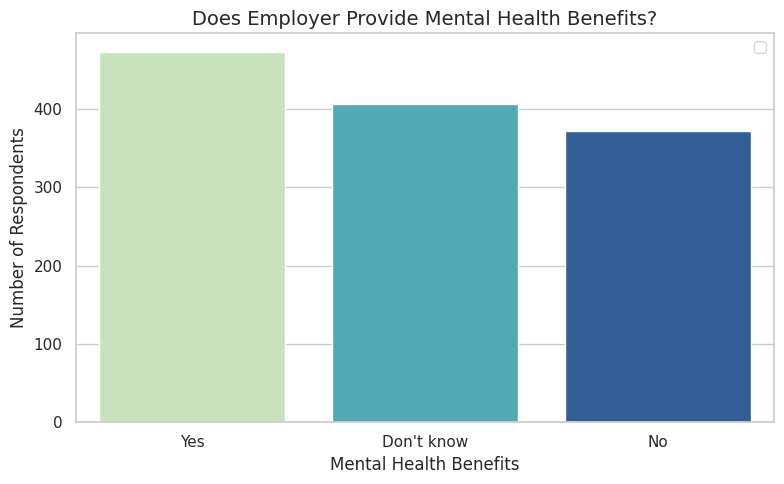

Mental Health Benefits Distribution:
 benefits
Yes           473
Don't know    407
No            372
Name: count, dtype: int64

(%) Percentage:
 benefits
Yes           37.779553
Don't know    32.507987
No            29.712460
Name: proportion, dtype: float64


In [99]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='benefits', palette='YlGnBu')
plt.title('Does Employer Provide Mental Health Benefits?', fontsize=14)
plt.xlabel('Mental Health Benefits')
plt.ylabel('Number of Respondents')
plt.legend()
plt.tight_layout()
plt.show()


benefits_counts = df['benefits'].value_counts()
benefits_percent = df['benefits'].value_counts(normalize=True) * 100
print("Mental Health Benefits Distribution:\n", benefits_counts)
print("\n(%) Percentage:\n", benefits_percent)



The data shows that only 37.9% of respondents reported having mental health benefits, while a significant 32.4% are unaware of whether such benefits exist. Additionally, 29.7% explicitly stated they do not have these benefits. This indicates a gap in communication or transparency around mental health support within organizations. The high percentage of uncertainty suggests that many employees may not be adequately informed about available resources. Improving awareness and accessibility could enhance employee well-being and trust.

### 5.2 Wellness program availability


<ipython-input-100-96ae89c8d789>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='wellness_program', palette='Blues')
<ipython-input-100-96ae89c8d789>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


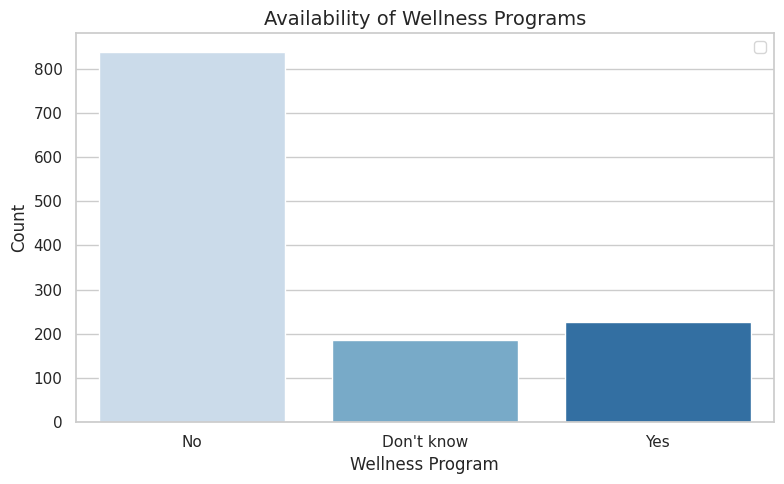


Wellness Program Availability:
 wellness_program
No            838
Yes           227
Don't know    187
Name: count, dtype: int64

(%) Percentage:
 wellness_program
No            66.932907
Yes           18.130990
Don't know    14.936102
Name: proportion, dtype: float64


In [100]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='wellness_program', palette='Blues')
plt.title('Availability of Wellness Programs', fontsize=14)
plt.xlabel('Wellness Program')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


# Display
wellness_counts = df['wellness_program'].value_counts()
wellness_percent = df['wellness_program'].value_counts(normalize=True) * 100
print("\nWellness Program Availability:\n", wellness_counts)
print("\n(%) Percentage:\n", wellness_percent)

The majority of respondents (66.9%) reported that their organization does not offer a wellness program, while only 18.2% said such a program is available. Additionally, 14.9% are unsure, indicating a lack of clarity or communication about wellness initiatives. This suggests that wellness programs are either underprovided or poorly promoted in many workplaces. Organizations may benefit from investing in and clearly communicating these programs to support employee health and engagement.

### 5.3 Help-seeking encouragement

<ipython-input-101-4a3e1c43d5dc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='seek_help', palette='Oranges')
<ipython-input-101-4a3e1c43d5dc>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


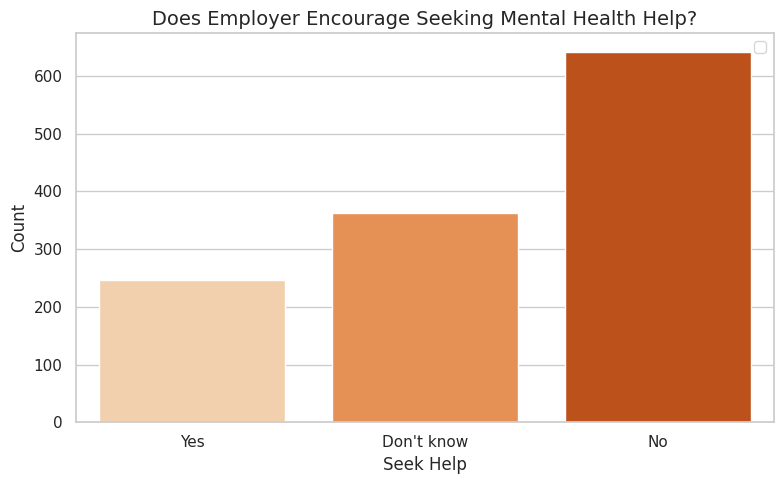


Help-Seeking Encouragement:
 seek_help
No            642
Don't know    363
Yes           247
Name: count, dtype: int64

(%) Percentage:
 seek_help
No            51.277955
Don't know    28.993610
Yes           19.728435
Name: proportion, dtype: float64


In [101]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='seek_help', palette='Oranges')
plt.title('Does Employer Encourage Seeking Mental Health Help?', fontsize=14)
plt.xlabel('Seek Help')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


seek_help_counts = df['seek_help'].value_counts()
seek_help_percent = df['seek_help'].value_counts(normalize=True) * 100
print("\nHelp-Seeking Encouragement:\n", seek_help_counts)
print("\n(%) Percentage:\n", seek_help_percent)

The data reveals that only 19.9% of respondents feel encouraged to seek help for mental health issues at work, while a concerning 51.3% say they are not encouraged. Additionally, 28.8% are unsure, highlighting a lack of clear support structures. This indicates that many workplaces may not be fostering an open or supportive environment for mental health. Enhancing communication and building a culture of encouragement could significantly improve employee well-being and trust.

### 5.4 Anonymity of mental health treatment

<ipython-input-102-74eec14ee266>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='anonymity', palette='Purples')
<ipython-input-102-74eec14ee266>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


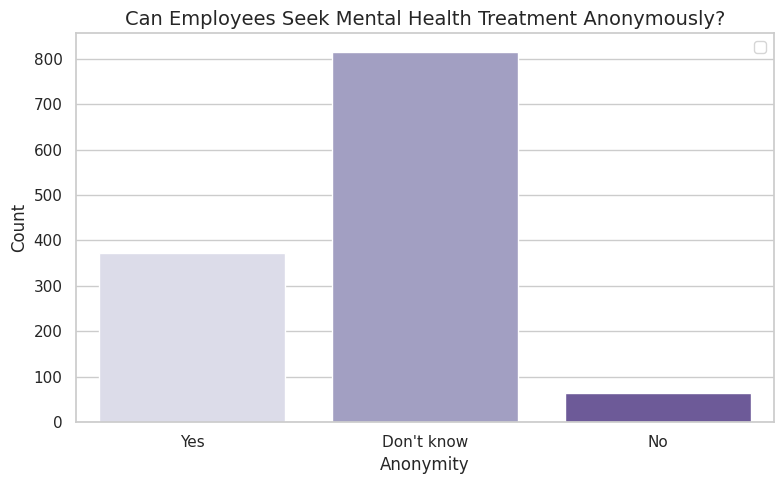


Anonymity in Mental Health Treatment:
 anonymity
Don't know    815
Yes           373
No             64
Name: count, dtype: int64

(%) Percentage:
 anonymity
Don't know    65.095847
Yes           29.792332
No             5.111821
Name: proportion, dtype: float64


In [102]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='anonymity', palette='Purples')
plt.title('Can Employees Seek Mental Health Treatment Anonymously?', fontsize=14)
plt.xlabel('Anonymity')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


anonymity_counts = df['anonymity'].value_counts()
anonymity_percent = df['anonymity'].value_counts(normalize=True) * 100
print("\nAnonymity in Mental Health Treatment:\n", anonymity_counts)
print("\n(%) Percentage:\n", anonymity_percent)

The data shows that a majority of respondents (65%) are unaware whether mental health treatment is offered anonymously in their workplace. Only 29.8% confirmed that anonymity is guaranteed, while a small 5.2% said it is not. This significant uncertainty points to a need for clearer communication about privacy and confidentiality in mental health support. Ensuring and promoting anonymity could encourage more employees to seek help without fear of stigma.

## 6. Attitudes Toward Mental Health Discussions

### 6.1 Comfortable discussing with coworkers

<ipython-input-103-235c27a5a6af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='coworkers', palette='Set3')
<ipython-input-103-235c27a5a6af>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


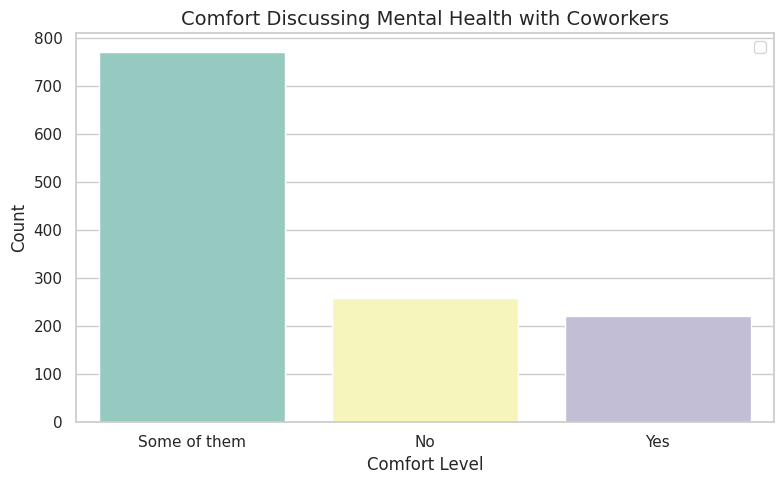

Comfort Discussing Mental Health with Coworkers:
 coworkers
Some of them    772
No              258
Yes             222
Name: count, dtype: int64

(%) Percentage:
 coworkers
Some of them    61.661342
No              20.607029
Yes             17.731629
Name: proportion, dtype: float64


In [103]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='coworkers', palette='Set3')
plt.title('Comfort Discussing Mental Health with Coworkers', fontsize=14)
plt.xlabel('Comfort Level')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()
coworkers_counts = df['coworkers'].value_counts()
coworkers_percent = df['coworkers'].value_counts(normalize=True) * 100
print("Comfort Discussing Mental Health with Coworkers:\n", coworkers_counts)
print("\n(%) Percentage:\n", coworkers_percent)

The data indicates that 61.5% of respondents feel comfortable discussing mental health with some of their coworkers, while only 17.9% feel comfortable talking openly with all coworkers. Meanwhile, 20.7% do not feel comfortable discussing mental health at work at all. This suggests that while there is some level of openness, many employees still face barriers to fully expressing mental health concerns. Promoting a more supportive and stigma-free workplace culture could help increase overall comfort and dialogue around mental health.

### 6.2 Comfortable discussing with supervisor

<ipython-input-104-823ec7ab3245>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='supervisor', palette='Set2')
<ipython-input-104-823ec7ab3245>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


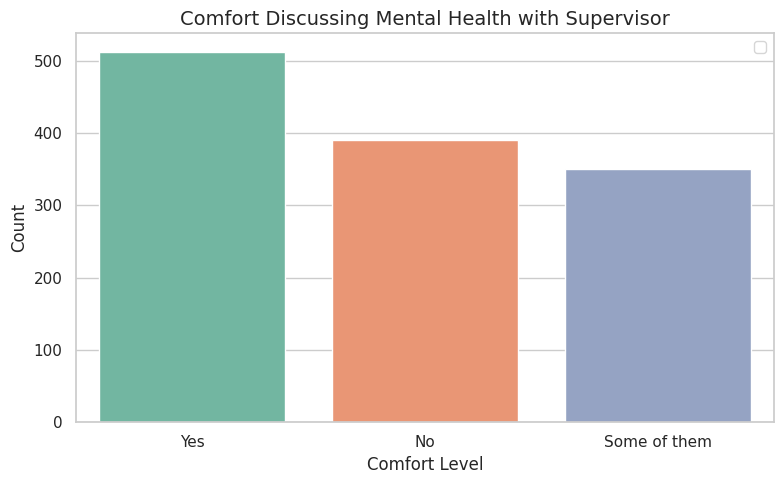


Comfort Discussing Mental Health with Supervisor:
 supervisor
Yes             512
No              390
Some of them    350
Name: count, dtype: int64

(%) Percentage:
 supervisor
Yes             40.894569
No              31.150160
Some of them    27.955272
Name: proportion, dtype: float64


In [104]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='supervisor', palette='Set2')
plt.title('Comfort Discussing Mental Health with Supervisor', fontsize=14)
plt.xlabel('Comfort Level')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()
supervisor_counts = df['supervisor'].value_counts()
supervisor_percent = df['supervisor'].value_counts(normalize=True) * 100
print("\nComfort Discussing Mental Health with Supervisor:\n", supervisor_counts)
print("\n(%) Percentage:\n", supervisor_percent)

The data reveals that about 41% of respondents feel comfortable discussing mental health issues with their supervisors, while 31.2% do not feel comfortable at all. Additionally, 27.8% feel comfortable with only some supervisors. This indicates that a significant portion of employees may hesitate to open up to leadership about mental health, possibly due to trust or stigma concerns. Building stronger, empathetic communication channels between supervisors and employees could improve mental health support and workplace well-being.

### 6.3 Ease of requesting mental health leave

<ipython-input-105-e321650b78e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='leave', palette='cubehelix')
<ipython-input-105-e321650b78e8>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


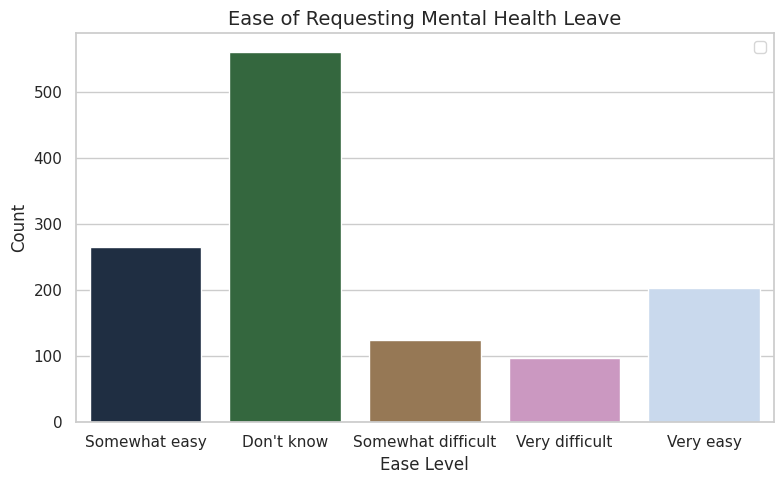


Ease of Requesting Mental Health Leave:
 leave
Don't know            561
Somewhat easy         265
Very easy             204
Somewhat difficult    125
Very difficult         97
Name: count, dtype: int64

(%) Percentage:
 leave
Don't know            44.808307
Somewhat easy         21.166134
Very easy             16.293930
Somewhat difficult     9.984026
Very difficult         7.747604
Name: proportion, dtype: float64


In [105]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='leave', palette='cubehelix')
plt.title('Ease of Requesting Mental Health Leave', fontsize=14)
plt.xlabel('Ease Level')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()
leave_counts = df['leave'].value_counts()
leave_percent = df['leave'].value_counts(normalize=True) * 100
print("\nEase of Requesting Mental Health Leave:\n", leave_counts)
print("\n(%) Percentage:\n", leave_percent)

The data shows that 44.7% of respondents are unsure about the ease of requesting mental health leave, highlighting a significant lack of clarity or communication. Among those who answered, 37.5% find it somewhat or very easy to request leave, while 17.8% find it somewhat or very difficult. This suggests that while some organizations have accessible processes, many employees still face challenges or uncertainty when seeking mental health leave. Improving transparency and simplifying these procedures could greatly enhance employee support and well-being.

## 7. Family History, Treatment, and Work Interference

### 7.1 Family history of mental illness

<ipython-input-106-5b6ae33e7ca8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='family_history', palette='cool')
<ipython-input-106-5b6ae33e7ca8>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


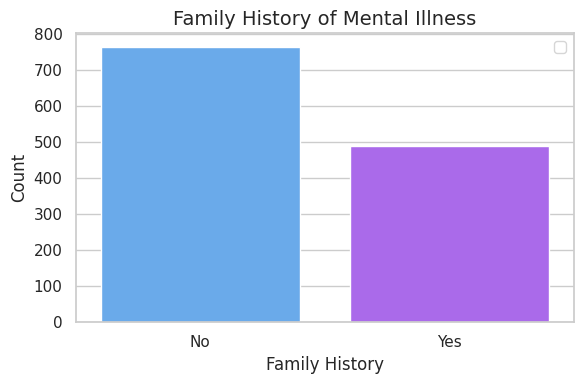

Family History of Mental Illness:
 family_history
No     763
Yes    489
Name: count, dtype: int64

(%) Percentage:
 family_history
No     60.942492
Yes    39.057508
Name: proportion, dtype: float64


In [106]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='family_history', palette='cool')
plt.title('Family History of Mental Illness', fontsize=14)
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

family_history_counts = df['family_history'].value_counts()
family_history_percent = df['family_history'].value_counts(normalize=True) * 100
print("Family History of Mental Illness:\n", family_history_counts)
print("\n(%) Percentage:\n", family_history_percent)

The data shows that approximately 39.1% of respondents report a family history of mental illness, while 60.9% do not. This significant portion with a family history highlights the importance of mental health awareness and support, as genetic and environmental factors can influence well-being. Organizations should consider this when designing mental health programs to ensure they address a wide range of employee needs.

### 7.2 Sought treatment

<ipython-input-107-1a28c631057c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='treatment', palette='summer')
<ipython-input-107-1a28c631057c>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


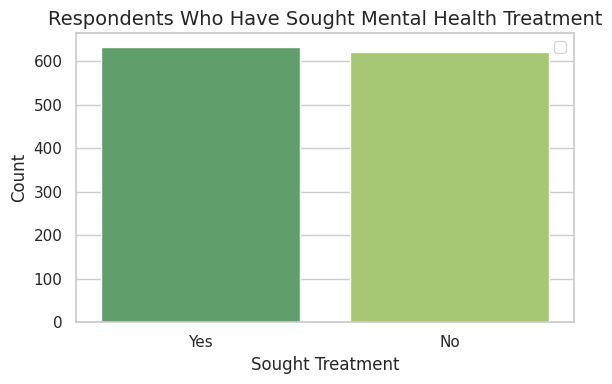


Sought Mental Health Treatment:
 treatment
Yes    632
No     620
Name: count, dtype: int64

(%) Percentage:
 treatment
Yes    50.479233
No     49.520767
Name: proportion, dtype: float64


In [107]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='treatment', palette='summer')
plt.title('Respondents Who Have Sought Mental Health Treatment', fontsize=14)
plt.xlabel('Sought Treatment')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

treatment_counts = df['treatment'].value_counts()
treatment_percent = df['treatment'].value_counts(normalize=True) * 100
print("\nSought Mental Health Treatment:\n", treatment_counts)
print("\n(%) Percentage:\n", treatment_percent)

The data reveals a nearly even split, with about 50.6% of respondents having sought mental health treatment and 49.4% not. This balance highlights that mental health challenges are widespread, affecting a significant portion of the population. It underscores the importance of accessible, effective mental health resources and support systems in both personal and professional contexts.

### 7.3 Work interference due to mental health

<ipython-input-108-6ce877d205ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='work_interfere', palette='viridis', order=df['work_interfere'].value_counts().index)
<ipython-input-108-6ce877d205ca>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


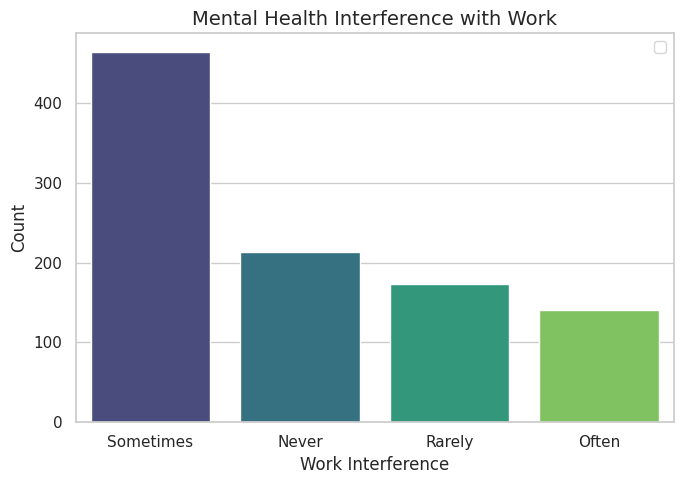


Work Interference Due to Mental Health:
 work_interfere
Sometimes    464
Never        213
Rarely       173
Often        140
Name: count, dtype: int64

(%) Percentage:
 work_interfere
Sometimes    46.868687
Never        21.515152
Rarely       17.474747
Often        14.141414
Name: proportion, dtype: float64


In [108]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='work_interfere', palette='viridis', order=df['work_interfere'].value_counts().index)
plt.title('Mental Health Interference with Work', fontsize=14)
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

work_interfere_counts = df['work_interfere'].value_counts()
work_interfere_percent = df['work_interfere'].value_counts(normalize=True) * 100
print("\nWork Interference Due to Mental Health:\n", work_interfere_counts)
print("\n(%) Percentage:\n", work_interfere_percent)

The data shows that nearly half of respondents (46.7%) experience mental health issues that sometimes interfere with their work. Meanwhile, 21.4% report no interference, and the remaining 32% experience interference rarely or often. This indicates that mental health significantly impacts workplace productivity for many employees. Organizations should prioritize supportive policies and resources to help mitigate these challenges and maintain employee well-being and performance.

# 3. Correlation Analysis

## 3.1 Import Required Libraries


In [63]:

import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')


## 3.2 Calculate Spearman Correlation Matrix and P-values

In [66]:
corr_matrix, pval_matrix = spearmanr(df)

corr_df = pd.DataFrame(corr_matrix, index=df.columns, columns=df.columns)
pval_df = pd.DataFrame(pval_matrix, index=df.columns, columns=df.columns)

print("Spearman Correlation Matrix:\n", corr_df)

print("\nP-values Matrix:\n", pval_df)


Spearman Correlation Matrix:
                        remote_work  employer_support  mental_health_history  \
remote_work                1.00000         -0.050580               0.053280   
employer_support          -0.05058          1.000000              -0.027742   
mental_health_history      0.05328         -0.027742               1.000000   
willingness_seek_help      0.07114          0.020373               0.055477   

                       willingness_seek_help  
remote_work                         0.071140  
employer_support                    0.020373  
mental_health_history               0.055477  
willingness_seek_help               1.000000  

P-values Matrix:
                        remote_work  employer_support  mental_health_history  \
remote_work               0.000000          0.617242               0.598556   
employer_support          0.617242          0.000000               0.784097   
mental_health_history     0.598556          0.784097               0.000000   
will

The Spearman correlation analysis reveals that there are no strong or statistically significant monotonic relationships among the variables remote_work, employer_support, mental_health_history, and willingness_seek_help. All correlation coefficients are close to zero, indicating very weak associations. For example, the highest observed correlation is just 0.071 between remote_work and willingness_seek_help, which is negligible. Additionally, all p-values are greater than 0.05, suggesting that none of the observed correlations are statistically significant. This implies that these variables tend to vary independently, and there is no meaningful monotonic trend linking them within the dataset.

## 3.3 Visualize Correlation with Heatmap

Visualizing the correlations helps identify strong/weak and significant relationships quickly.


<ipython-input-109-30e52b6c6d57>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


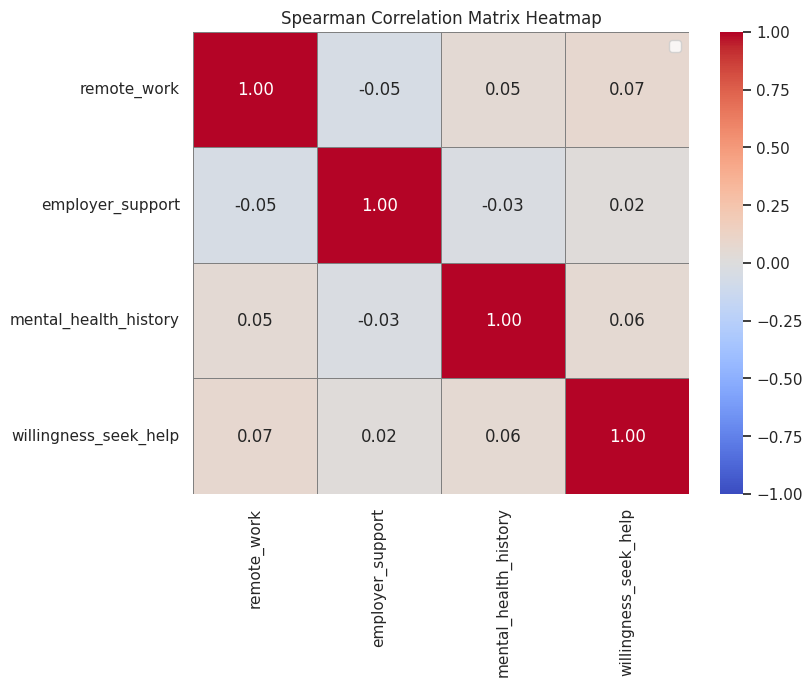

In [109]:
plt.figure(figsize=(8,6))

sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    linecolor='gray',
    cbar=True
)

plt.title('Spearman Correlation Matrix Heatmap')
plt.legend()
plt.show()


- Heatmap colors: red = negative correlation, blue = positive correlation.

- Numbers inside cells show the correlation coefficient values.

- Darker colors mean stronger correlation.

## 3.4 Interpret Correlations with Significance

To assist interpretation, here is a helper function and printed summary that tells you the strength, direction, and significance of each variable pair’s correlation.

In [68]:
def interpret_correlation(r, p):
    """Interpret correlation strength and significance."""
    if abs(r) < 0.2:
        strength = 'very weak'
    elif abs(r) < 0.4:
        strength = 'weak'
    elif abs(r) < 0.6:
        strength = 'moderate'
    elif abs(r) < 0.8:
        strength = 'strong'
    else:
        strength = 'very strong'

    significance = 'significant' if p < 0.05 else 'not significant'
    direction = 'positive' if r > 0 else 'negative'

    return f"{strength}, {significance} {direction} correlation"

print("Correlation Interpretations:\n")

for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        var1 = df.columns[i]
        var2 = df.columns[j]
        r = corr_df.iloc[i, j]
        p = pval_df.iloc[i, j]
        interpretation = interpret_correlation(r, p)
        print(f"{var1} & {var2}: r={r:.2f}, p={p:.3f} --> {interpretation}")


Correlation Interpretations:

remote_work & employer_support: r=-0.05, p=0.617 --> very weak, not significant negative correlation
remote_work & mental_health_history: r=0.05, p=0.599 --> very weak, not significant positive correlation
remote_work & willingness_seek_help: r=0.07, p=0.482 --> very weak, not significant positive correlation
employer_support & mental_health_history: r=-0.03, p=0.784 --> very weak, not significant negative correlation
employer_support & willingness_seek_help: r=0.02, p=0.841 --> very weak, not significant positive correlation
mental_health_history & willingness_seek_help: r=0.06, p=0.584 --> very weak, not significant positive correlation


The correlation analysis between key workplace mental health variables reveals consistently very weak and statistically non-significant relationships. Specifically, the correlation between remote_work and employer_support (r = -0.05, p = 0.617) suggests a negligible negative relationship, while remote_work shows similarly weak and non-significant positive correlations with both mental_health_history (r = 0.05, p = 0.599) and willingness_seek_help (r = 0.07, p = 0.482). Likewise, employer_support demonstrates negligible correlations with both mental_health_history (r = -0.03, p = 0.784) and willingness_seek_help (r = 0.02, p = 0.841). Lastly, the association between mental_health_history and willingness_seek_help remains weak and statistically insignificant (r = 0.06, p = 0.584).

---


---


# Predictive Modeling

## 1. What is the problem being solved?
I am building a classification model to predict whether an individual is likely to seek mental health support or not, based on features such as:

- remote_work — whether they work remotely

- employer_support (or similar feature) — if their employer supports mental health

- mental_health_history — past history of mental health issues

My target variable is something like willingness_seek_help or seek_help which encodes whether the individual seeks help.

<ipython-input-110-64e5f1566a95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.codes
<ipython-input-110-64e5f1566a95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.codes
<ipython-input-110-64e5f1566a95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

Logistic Regression Accuracy: 0.5936254980079682
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.62      0.08      0.14        66
           1       0.60      0.93      0.73       134
           2       0.58      0.37      0.45        51

    accuracy                           0.59       251
   macro avg       0.60      0.46      0.44       251
weighted avg       0.60      0.59      0.52       251



<ipython-input-110-64e5f1566a95>:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


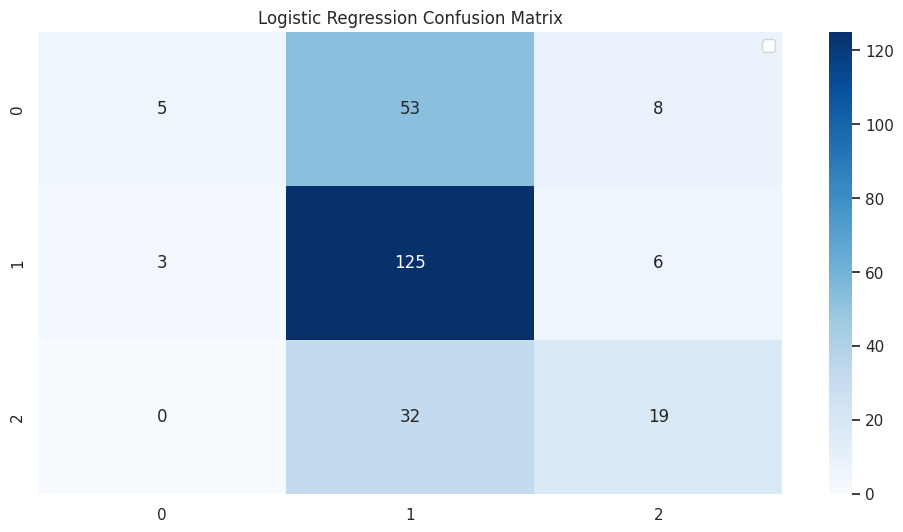

Decision Tree Accuracy: 0.50199203187251
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40        66
           1       0.66      0.59      0.62       134
           2       0.44      0.27      0.34        51

    accuracy                           0.50       251
   macro avg       0.48      0.45      0.45       251
weighted avg       0.53      0.50      0.51       251



<ipython-input-110-64e5f1566a95>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


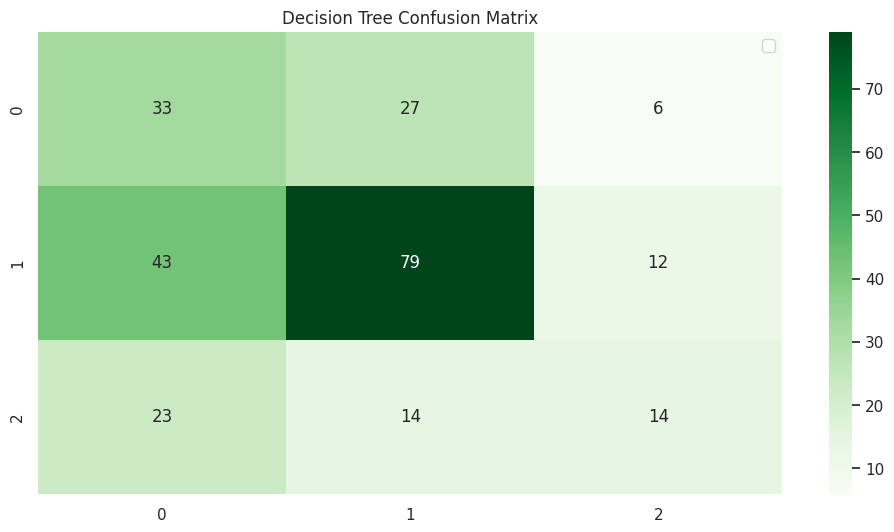

In [110]:
# Select features - adjust based on your knowledge of the dataset
features = ['remote_work', 'family_history', 'treatment', 'work_interfere',
            'mental_health_consequence', 'mental_health_interview', 'supervisor', 'benefits']

X = df[features]

# Target variable
y = df['seek_help']

# Check if any feature columns are categorical - encode them
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = X[col].astype('category').cat.codes

# If target is categorical, encode it as well
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Now split the data and proceed with training/testing as before
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Evaluate models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.legend()
plt.show()

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.legend()
plt.show()


## 2. How does the model make predictions?

Using classification algorithms like:

- Logistic Regression

- Decision Tree Classifier

The model learns patterns in the data that connect the features to the target.

**Example:**

- Individuals working remotely (remote_work = yes) might be more or less likely to seek help.

- If an employer actively supports mental health programs (employer_support = yes), the person might be more encouraged to seek help.

- A personal or family history of mental health issues (mental_health_history = yes) might also increase the likelihood.

The model analyzes all these features together and learns statistical relationships:

- **Logistic Regression** learns the probability that a person will seek help given those features — it outputs a probability between 0 and 1.

- **Decision Trees** learn a set of “rules” like:

bash

if employer_support == yes and mental_health_history == yes -> likely to seek help
else if remote_work == no and mental_health_history == no -> unlikely to seek help
...



## 3. How does it work under the hood?
- Training phase: The model takes your historical dataset (where you know the answers) and finds the best parameters or rules to separate those who sought help from those who didn’t.

- Prediction phase: For a new individual (or a test sample), it applies those learned rules or coefficients to output a predicted class (e.g., will seek help or will not).

## 4. Limitations

- Class imbalance: If most people don’t seek help, the model might skew predictions toward that class.


## 5. Interpretability and Usefulness
- Logistic regression coefficients can help you understand which features increase or decrease likelihood.

- Decision trees are easy to visualize and explain in terms of decision rules.

- Both models give actionable insights into which factors most influence mental health help-seeking behavior.
